# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [2]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          2.09e-259
Time:                        18:27:00   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

Higher

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

Yes,  P-value shows the significance of the parameter.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

0.459 * 40 - 0.459 * 20

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

20.7 %

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [12]:
da['RIDRETH1'].value_counts()

3    1692
4    1058
1     896
5     771
2     685
Name: RIDRETH1, dtype: int64

In [3]:
da['RIDRETH1x'] = da.RIDRETH1.replace({1:"Mexican American",
2:"Other Hispanic",
3:"Non-Hispanic White",
4:"Non-Hispanic Black",
5:"Other Race - Including Multi-Racial"})

In [4]:
da['RIAGENDR'].value_counts()

2    2640
1    2462
Name: RIAGENDR, dtype: int64

In [5]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [6]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     253.1
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          4.26e-284
Time:                        18:27:09   Log-Likelihood:                -21456.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5095   BIC:                         4.297e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          100.4207      0.850    118.135      0.000      98.754     102.087
RIAGENDRx[T.Male]                                    3.3870      0.456      7.435      0.000       2.494       4.280
RIDRETH1x[T.Non-Hispanic Black]                      3.6882      0.737      5.004      0.000       2.243       5.133
RIDRETH1x[T.Non-Hispanic White]                     -2.3120      0.674     -3.432      0.001      -3.633      -0.991
RIDRETH1x[T.Other Hispanic]                          0.5947      0.824      0.721      0.471      -1.021       2.211
RIDRETH1x[T.Other Race - Including Multi-Racial]    -1.7842      0.798     -2.235      0.025      -3.350      -0.219
RIDAGEYR                                             0.4805      0.013     37.001      0.000       0.455       0.506
==============================================================================
Omnibus:                      692.818   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1536.495
Skew:                           0.807   Prob(JB):                         0.00
Kurtosis:                       5.150   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

Remains the same

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

Remained the same.

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

3%

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

0.4805 * 10

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

Can't say!

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [9]:
# enter your code here

da25 = da.sample(frac=0.25)

In [10]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da25)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     61.90
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           1.93e-67
Time:                        18:29:31   Log-Likelihood:                -5353.3
No. Observations:                1276   AIC:                         1.072e+04
Df Residuals:                    1269   BIC:                         1.076e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          100.2345      1.652     60.678      0.000      96.994     103.475
RIAGENDRx[T.Male]                                    2.0570      0.907      2.267      0.024       0.277       3.837
RIDRETH1x[T.Non-Hispanic Black]                      3.8189      1.461      2.614      0.009       0.953       6.685
RIDRETH1x[T.Non-Hispanic White]                     -0.9659      1.332     -0.725      0.468      -3.579       1.647
RIDRETH1x[T.Other Hispanic]                          0.9536      1.624      0.587      0.557      -2.233       4.140
RIDRETH1x[T.Other Race - Including Multi-Racial]     0.1094      1.599      0.068      0.945      -3.027       3.246
RIDAGEYR                                             0.4779      0.026     18.703      0.000       0.428       0.528
==============================================================================
Omnibus:                      139.512   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.375
Skew:                           0.704   Prob(JB):                     4.76e-57
Kurtosis:                       4.702   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

standard errors increased, coefficients reduced.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

In [11]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     253.1
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          4.26e-284
Time:                        18:36:13   Log-Likelihood:                -21456.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5095   BIC:                         4.297e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          100.4207      0.850    118.135      0.000      98.754     102.087
RIAGENDRx[T.Male]                                    3.3870      0.456      7.435      0.000       2.494       4.280
RIDRETH1x[T.Non-Hispanic Black]                      3.6882      0.737      5.004      0.000       2.243       5.133
RIDRETH1x[T.Non-Hispanic White]                     -2.3120      0.674     -3.432      0.001      -3.633      -0.991
RIDRETH1x[T.Other Hispanic]                          0.5947      0.824      0.721      0.471      -1.021       2.211
RIDRETH1x[T.Other Race - Including Multi-Racial]    -1.7842      0.798     -2.235      0.025      -3.350      -0.219
RIDAGEYR                                             0.4805      0.013     37.001      0.000       0.455       0.506
==============================================================================
Omnibus:                      692.818   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1536.495
Skew:                           0.807   Prob(JB):                         0.00
Kurtosis:                       5.150   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

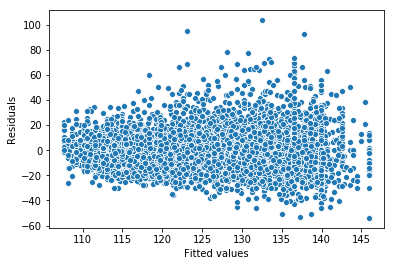

In [12]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

As the fitted value increases, the variance increase.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [14]:
da['RIDRETH1x'].value_counts()

Non-Hispanic White                     1692
Non-Hispanic Black                     1058
Mexican American                        896
Other Race - Including Multi-Racial     771
Other Hispanic                          685
Name: RIDRETH1x, dtype: int64

In [13]:
da.columns #'BMXBMI' ~ 'RIDAGEYR'

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'RIDRETH1x', 'RIAGENDRx'],
      dtype='object')

In [16]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           3.98e-59
Time:                        19:13:06   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.2361      0.355     87.891      0.000      30.539      31.933
RIAGENDRx[T.Male]                                   -1.0226      0.190     -5.370      0.000      -1.396      -0.649
RIDRETH1x[T.Non-Hispanic Black]                     -0.4499      0.308     -1.460      0.144      -1.054       0.154
RIDRETH1x[T.Non-Hispanic White]                     -1.8555      0.282     -6.588      0.000      -2.408      -1.303
RIDRETH1x[T.Other Hispanic]                         -0.9379      0.345     -2.721      0.007      -1.614      -0.262
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIDAGEYR                                             0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'RIAGENDR', 'BPXSY1', 'SMQ020', 'DMDEDUC2', 'RIDRETH1' in data frame but not in summaries or values.
  ValueWarning)


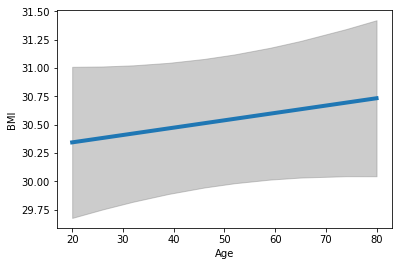

In [17]:
from statsmodels.sandbox.predict_functional import predict_functional

values = {"RIAGENDRx": "Male", "RIDRETH1x": "Mexican American"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'RIAGENDR', 'BPXSY1', 'SMQ020', 'DMDEDUC2', 'RIDRETH1' in data frame but not in summaries or values.
  ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'RIAGENDR', 'BPXSY1', 'SMQ020', 'DMDEDUC2', 'RIDRETH1' in data frame but not in summaries or values.
  ValueWarning)


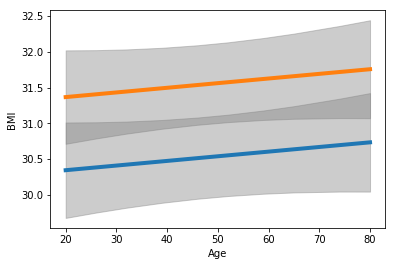

In [18]:
from statsmodels.sandbox.predict_functional import predict_functional

values = {"RIAGENDRx": "Male", "RIDRETH1x": "Mexican American"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

values = {"RIAGENDRx": "Female", "RIDRETH1x": "Mexican American"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

In [19]:
#Intervals overlap on all the ages.

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

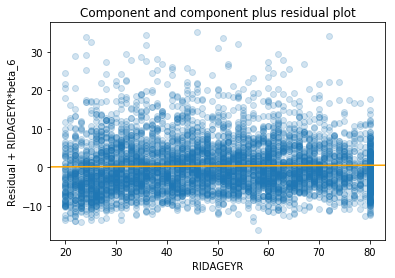

In [20]:
# enter your code here

# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()
plot_ccpr(result, "RIDAGEYR", ax)
ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

__Q6a.__ What is your interpretation of the added variable plot?

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [ ]:
# enter your code here

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [ ]:
# enter your code here

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [ ]:
# enter your code here

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

In [ ]:
# enter your code here

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?